In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import random
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from math import sqrt, pi
from collections import defaultdict
import numpy as np
from scipy.linalg import sqrtm
import pandas
import matplotlib
import numpy
from qiskit.quantum_info.operators.random import random_unitary
from qiskit.quantum_info.states import partial_trace
from qiskit.quantum_info.operators import Operator, Pauli
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Enter N:  8
bob wants the qubit 1 or 2 :  1


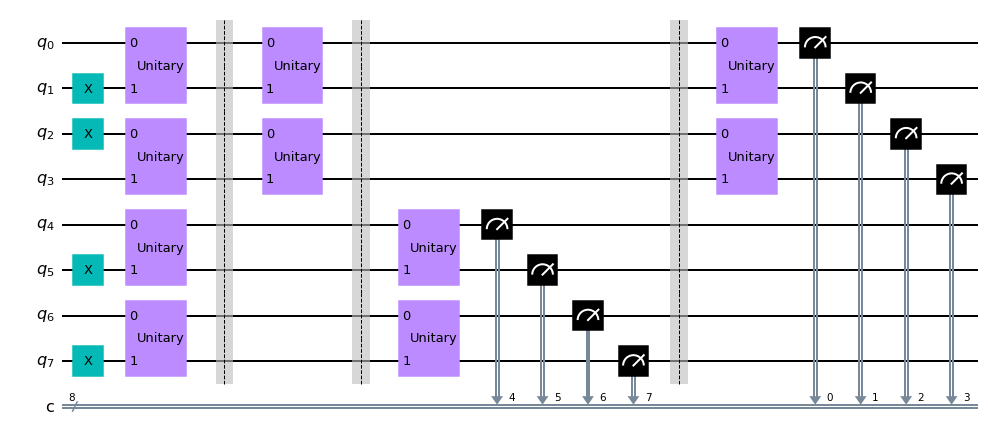

In [2]:
#kak's three-pass secure message transfer protocol


from qiskit.opflow import X, Y, Z
from qiskit.opflow.primitive_ops import MatrixOp
import numpy as np


n = int(input("Enter N: "))
l = list(np.arange(0, n))

qc=QuantumCircuit(n,n)
num = random.sample(l, int(n/2))
qc.x(num)
ZZ= Operator(Pauli('ZZ'))
XX = Operator(Pauli('XY'))
qc.append(XX,[0,1])
qc.append(XX,[2,3])
qc.append(XX,[4,5])
qc.append(XX,[6,7])


qc.barrier()

bob = int(input("bob wants the qubit 1 or 2 : "))
if bob == 1:
    qc.append(ZZ,[0,1])
    qc.append(ZZ,[2,3])
    
if bob == 2:
    qc.append(ZZ,[4,5])
    qc.append(ZZ,[6,7])
    
qc.barrier()

X=numpy.transpose(XX)
XX1 = X.conjugate()
XX11= Operator(XX1)

Z=numpy.transpose(ZZ)
ZZ1 =Z.conjugate()
ZZ11= Operator(ZZ1)

if bob == 1:
    qc.append(XX11,[4,5])
    qc.append(XX11,[6,7])
    qc.measure([4,5,6,7],[4,5,6,7])
    qc.barrier()
    qc.append(ZZ11,[0,1])
    qc.append(ZZ11,[2,3])
    qc.measure([0,1,2,3],[0,1,2,3])
    
if bob == 2:
    qc.append(XX11,[0,1])
    qc.append(XX11,[2,3])
    qc.measure([0,1,2,3],[0,1,2,3])
    qc.barrier()
    qc.append(ZZ11,[4,5])
    qc.append(ZZ11,[6,7])
    qc.measure([4,5,6,7],[4,5,6,7])
    
    

    
    
    
qc.draw()

In [3]:
import collections
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, shots= 1000)
job = aer_sim.run(qobj)
hist = job.result().get_counts()
print(hist)



{'10101001': 1000}


In [4]:
qc.measure(0,0)
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

Traceback (most recent call last):
  Input In [4] in <cell line: 3>
    result = execute(qc, backend=simulator).result()
NameError: name 'execute' is not defined

Use %tb to get the full traceback.
